In [109]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

/tmp/ipykernel_22293/3261762145.py:25: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0, .9, 1])


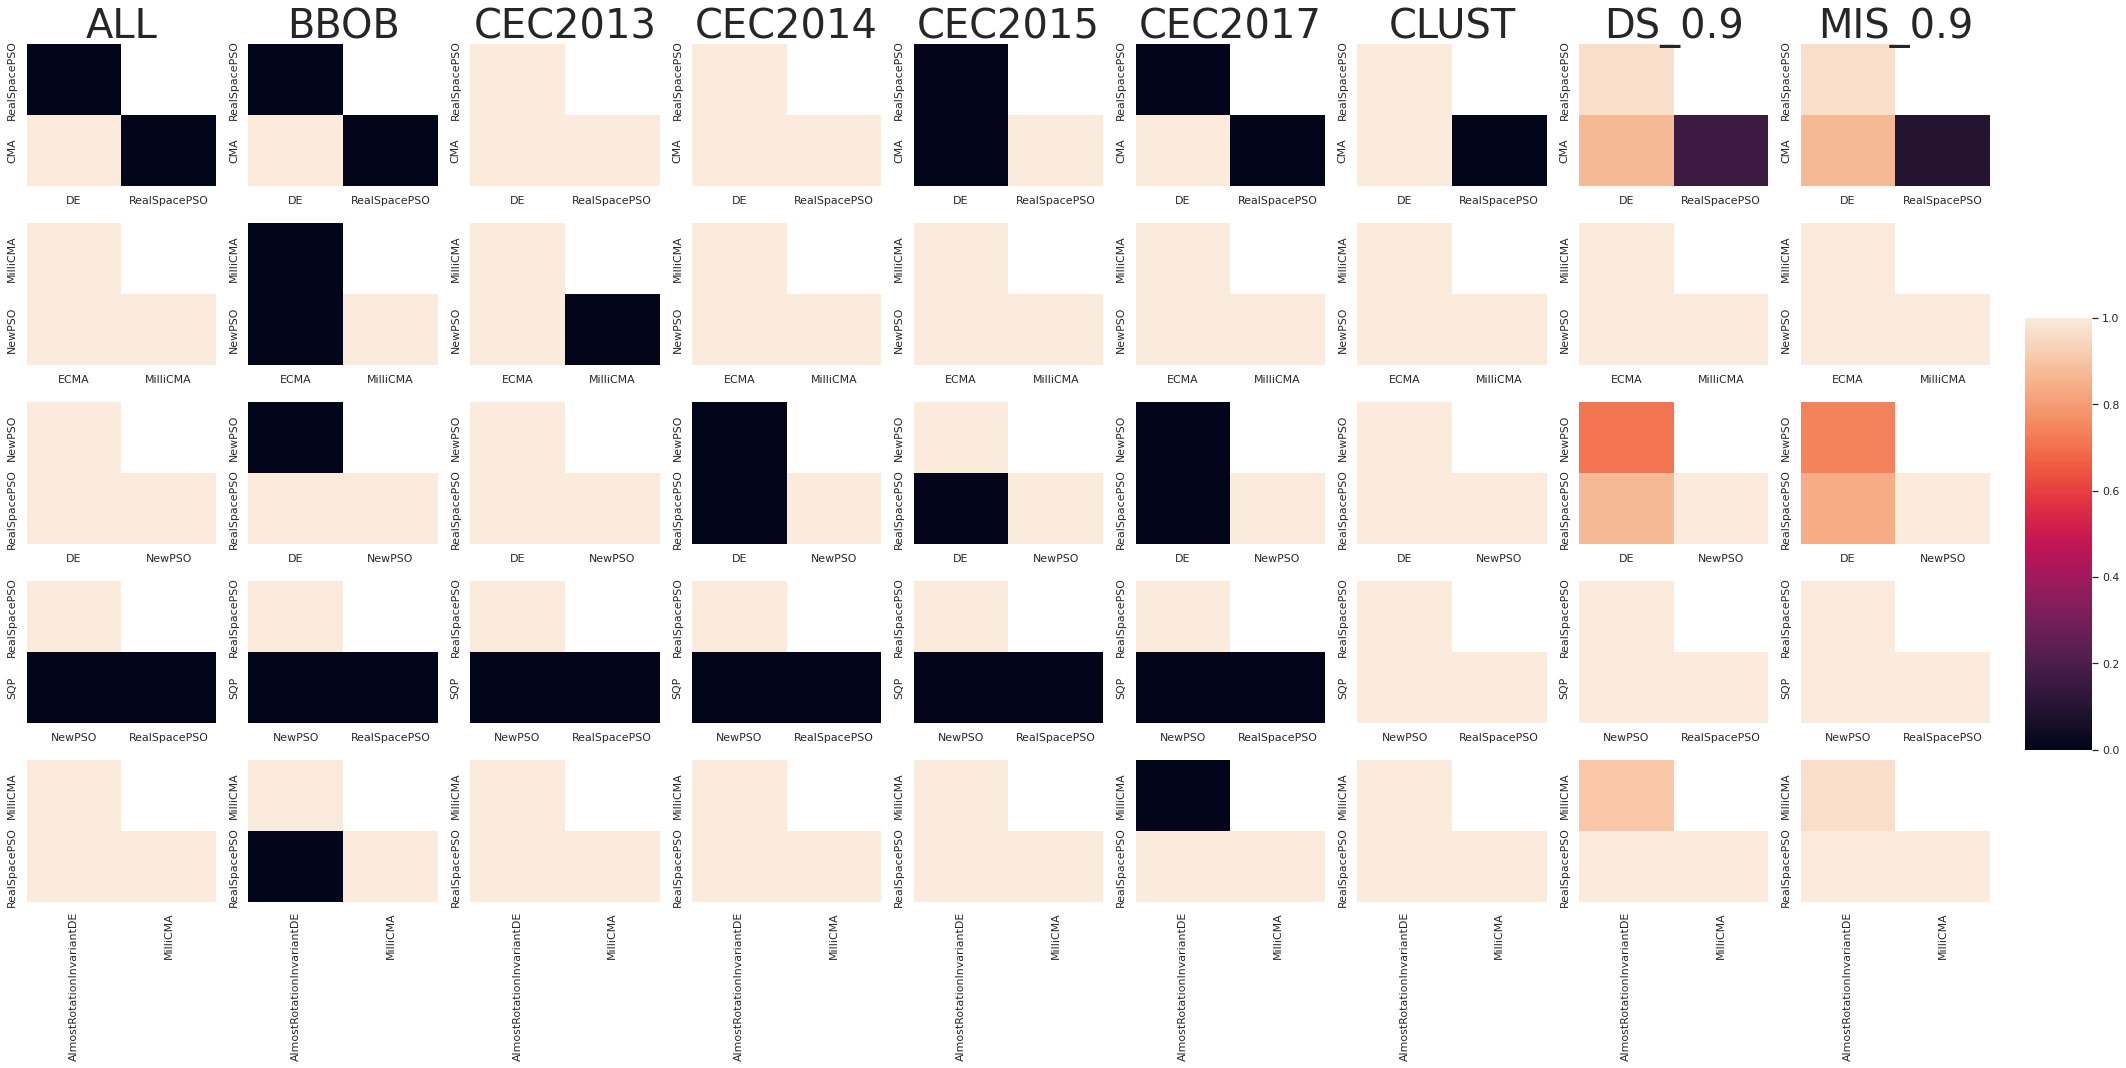

In [151]:
mpl.rcParams['axes.labelsize'] = 'xx-large'
#mpl.rcParams['axes.titlesize'] = 'large'
sns.set(font_scale = 1)
number_of_portfolios=5
selection_strategies=['all', 'bbob', 'cec2013', 'cec2014', 'cec2015', 'cec2017', 'clust', 'dominant_0.9', 'mis_0.9']
fig,axs = plt.subplots(number_of_portfolios,len(selection_strategies), sharex=False, sharey=False, figsize=(len(selection_strategies) * 3 + 4, number_of_portfolios*3))
cbar_ax = fig.add_axes([.91, .3, .03, .4])
for portfolio_index in range (0,number_of_portfolios):
    for selection_index, selection in enumerate(selection_strategies):
        result_df = pd.read_csv(f'outcomes/comb{portfolio_index}/{selection}_bin.txt', sep='\t')
        #result_df.columns=[f'A_{portfolio_index}_1',f'A_{portfolio_index}_2']
        #result_df.index=[f'A_{portfolio_index}_2',f'A_{portfolio_index}_3']
        
        #result_df.columns=[f'A_1',f'A_2']
        #result_df.index=[f'A_2',f'A_3']
        if selection in ['dominant_0.9', 'mis_0.9']:
            result_df/=31
        if selection in ['clust']:
            result_df/=15
        if portfolio_index==0:
            selection_name = selection.upper() if not selection.startswith('dominant') else 'DS_0.9'
            axs[portfolio_index, selection_index].set_title(selection_name, fontsize=40)
        g = sns.heatmap(result_df, ax = axs[portfolio_index, selection_index], cbar=selection_index==0, cbar_ax=cbar_ax, vmin=0, vmax=1)
        g.set_facecolor('white')
fig.tight_layout(rect=[0, 0, .9, 1])
plt.savefig('portfolio_analysis.pdf')
plt.show()